In [1]:
import pickle
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Get the path of the current script (or current working directory)
parent_dir = os.path.dirname(os.getcwd())
# Append the parent directory to sys.path
sys.path.append(parent_dir)

import src
from src.PrePipelineSteps import Pycromanager2NativeDataType, Make_Output_Dir_JF, Make_Analysis_Dir_JF, \
                                    ConsolidateImageShapes, TrimZSlices, AutomaticSpotDetection_JF

from src.PipelineSteps import CellSegmentationStepClass_JF, BIGFISH_SpotDetection, SimpleCellposeSegmentaion, ParamOptimizer_BIGFISH_SpotDetection, \
                                TrackPy_SpotDetection

from src.PostPipelineSteps import BuildPDFReport, SaveSpotDetectionResults, SaveMasksToAnalysis, SendAnalysisToNAS, \
                                    DeleteTempFiles, TrackPyAnlaysis

                            

from src import Experiment, PipelineSettings, ScopeClass, PipelineDataClass, Pipeline

from pycromanager import Dataset

def save_dict_to_file(dic, location):
    f = open(location,'w')
    f.write(str(dic))
    f.close()

In [2]:
ds = Dataset(r'\\munsky-nas.engr.colostate.edu\share\RNA_diffusion_data\03052024_H128_IntronDiffusion\H128FastVids_5ms_0ND_green_40mw_5')

Dataset opened                 


In [3]:
kwargs = {'nucChannel': [0], 'FISHChannel': [0],
          'user_select_number_of_images_to_run': 5, 
          'spot_yx': 450, 
          'spot_z': 1000, 
          'bigfish_alpha': 0.5, 
          'bigfish_beta': 1, 
          'bigfish_gamma': 5, 
          'use_log_hook': True,
          'timestep_s': (5+20) * 1e-3, # convert ms to s
          'spot_yx_px': 13,
          'spot_z_px': 1,
          'analysis_location': None,
          'trackpy_minmass': 300,
          'sub_pixel_fitting': False,
          'trackpy_max_lagtime': 200
          }

In [4]:
compiler = src.SingleStepCompiler(ds, kwargs)


Frame 4: 146 trajectories present.


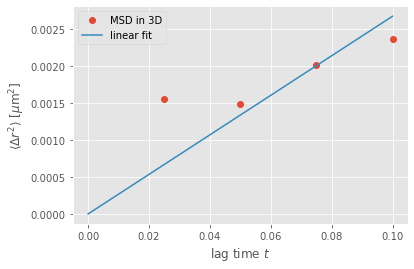

The diffusion constant is 0.00 μm²/s
lagtime 200


In [5]:
output = compiler.sudo_run_step(BIGFISH_SpotDetection)
compiler.kwargs = {**compiler.kwargs, **output.__dict__}
output = compiler.sudo_run_step(TrackPyAnlaysis)

In [7]:
output[0]

,z_px,y_px,x_px,cluster_index,timepoint,fov,FISH_Channel,xum,yum,zum,frame,particle
0,0.0,54.0,276.0,-1.0,0,0,0,35.88,7.02,0.0,0,0
104,0.0,347.0,175.0,-1.0,0,0,0,22.75,45.11,0.0,0,1
105,0.0,348.0,138.0,-1.0,0,0,0,17.94,45.24,0.0,0,2
106,0.0,348.0,322.0,-1.0,0,0,0,41.86,45.24,0.0,0,3
107,0.0,352.0,279.0,-1.0,0,0,0,36.27,45.76,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
49,0.0,282.0,299.0,-1.0,4,0,0,38.87,36.66,0.0,4,245
50,0.0,284.0,311.0,-1.0,4,0,0,40.43,36.92,0.0,4,158
51,0.0,289.0,331.0,-1.0,4,0,0,43.03,37.57,0.0,4,159
35,0.0,130.0,306.0,-1.0,4,0,0,39.78,16.90,0.0,4,99
